In [40]:
import numpy as np
import os
import pickle
from matplotlib import pyplot as plt


base_dir = os.getcwd()
file = 'data/entire_field_raw_3_class/jumping/train/entire_field_raw_jumping6.pkl'
sample_file_path = os.path.join(base_dir,file)

bg_noise = 'data/03_09_2024_bg_noise/bg_noise6.pkl'
bg_noise_path = os.path.join(base_dir, bg_noise)


In [41]:
with open(sample_file_path, 'rb') as sample_file_path:
    data = pickle.load(sample_file_path)

with open(bg_noise_path, 'rb') as bg_noise_path:
    bg_noise = pickle.load(bg_noise_path)

In [42]:
points = np.vstack(data)
bg_noise = np.vstack(bg_noise)

In [43]:
print(len(points))
print(points[:5,])

660
[[  0.7397   4.527    1.305    0.     162.    ]
 [  1.992    3.88     2.004    0.     134.    ]
 [  0.7046   3.729    1.146    0.     134.    ]
 [  2.174    2.742    1.036    0.     175.    ]
 [  0.2368   2.393    1.532   -0.626  234.    ]]


In [44]:
print(len(bg_noise))
print(points[:5,])

394
[[  0.7397   4.527    1.305    0.     162.    ]
 [  1.992    3.88     2.004    0.     134.    ]
 [  0.7046   3.729    1.146    0.     134.    ]
 [  2.174    2.742    1.036    0.     175.    ]
 [  0.2368   2.393    1.532   -0.626  234.    ]]


In [45]:
x_points = points[:,0]
y_points = points[:,1]
z_points = points[:,2]

bg_x = bg_noise[:,0]
bg_y = bg_noise[:,1]
bg_z = bg_noise[:,2]

Text(0.5, 0, 'Z')

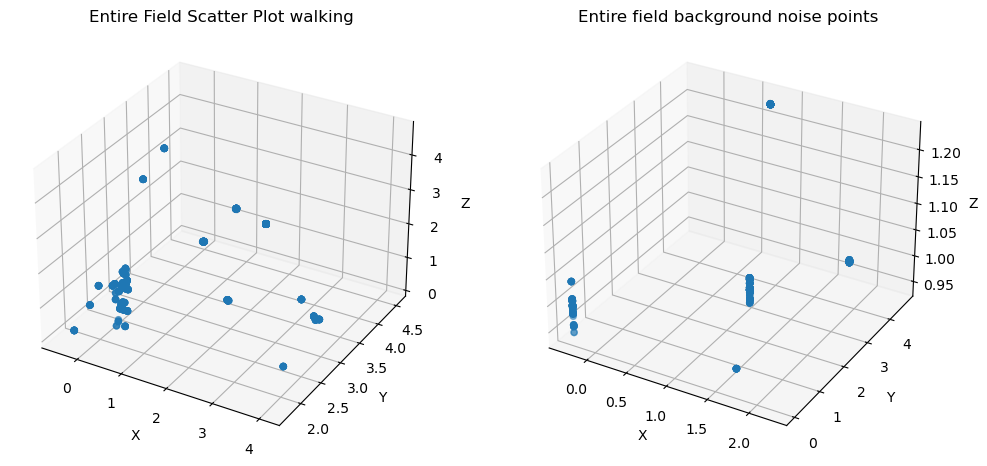

In [46]:
fig, (ax, ax1) = plt.subplots(1,2, subplot_kw={'projection': '3d'}, figsize=(12,6))
ax.scatter(x_points,y_points,z_points)
ax.set_title('Entire Field Scatter Plot walking')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax1.scatter(bg_x, bg_y, bg_z)
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

In [47]:
def background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for point in current_frame_data:
        distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
        if np.min(distances) > threshold:
            filtered_data.append(point)
        else:
            num_points_removed +=1
            points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data), np.array(points_removed)
        

In [48]:
def unstacked_background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    num_points_removed = 0
    for point in current_frame_data:
        distances = np.linalg.norm(background_data[:, :3]- point[:3], axis =1)
        if np.min(distances) > threshold:
            filtered_data.append(point)
        else:
            num_points_removed +=1
            points_removed.append(point)
    print(f"points removed: {num_points_removed}")
    return np.array(filtered_data), np.array(points_removed)
        

In [49]:
filtered_points,points_removed = background_subtraction(bg_noise, points, threshold=0.1)

points removed: 6


(0.15234375, 4.62109375)

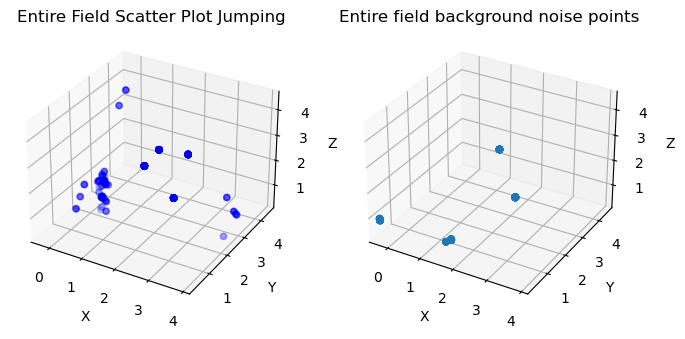

In [50]:
fig, (ax, ax1) = plt.subplots(1,2, subplot_kw={'projection': '3d'}, figsize=(8,12))
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='pink', alpha=1, label='Points Removed')
ax.scatter(filtered_points[:,0],filtered_points[:,1],filtered_points[:,2], color='blue', alpha=0.1, label='Filtered Points')

ax.set_title('Entire Field Scatter Plot Jumping')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the same x and y limits for both plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

ax1.scatter(bg_x, bg_y, bg_z)
ax1.set_title("Entire field background noise points")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)

In [51]:
#find average energy strength of points that weren't filtered
np.mean(filtered_points[:,4])
#find average energy strength of points that were filtered out
np.mean(points_removed[:,4])
#average energy strength of background noise
np.mean(bg_noise[:,4])

158.8

In [52]:
from glob import glob
##create array
bg_noise_merge = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        bg_noise_merge.append(data)
bg_noise_merge = np.vstack(bg_noise_merge)

#open file and merge to array
#store array in new file with entire merged bgnoise data


In [53]:
print(bg_noise_merge)

[[ 7.397e-01  4.723e+00  1.267e+00  0.000e+00  1.970e+02]
 [ 2.260e+00  2.760e+00  1.114e+00  0.000e+00  1.640e+02]
 [ 4.944e-01  1.211e-01  8.691e-01  0.000e+00  1.260e+02]
 ...
 [ 4.944e-01  1.289e-01  8.584e-01  0.000e+00  1.250e+02]
 [-1.237e+00  6.523e-01  2.832e-01  0.000e+00  1.260e+02]
 [ 1.584e+00 -7.812e-02  1.413e+00  0.000e+00  1.260e+02]]


In [54]:
file_path = 'data/03_09_2024_katie_pc_bg_noise/all_samples_merged.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(bg_noise_merge, file)


In [55]:
bg_noise_merge.shape

(150207, 5)

In [56]:

def track_background_subtraction(background_data, current_frame_data, threshold=0.1):
    filtered_data = []
    points_removed = []
    corresponding_bg_point = []
    num_points_removed = 0
    
    for point in current_frame_data:
        # Calculate distances between the current frame point and all background points
        distances = np.linalg.norm(background_data[:, :3] - point[:3], axis=1)
        
        # Find the minimum distance and the index of the corresponding background point
        min_distance_idx = np.argmin(distances)
        
        if distances[min_distance_idx] > threshold:
            filtered_data.append(point)  # Keep this point if the distance is larger than the threshold
        else:
            num_points_removed += 1
            points_removed.append(point)  # Mark this point as removed
            corresponding_bg_point.append(background_data[min_distance_idx])  # Append the corresponding background point
    
    print(f"Points removed: {num_points_removed}")
    print(f"points kept: {len(filtered_data)}")
    
    # Return filtered points, removed points, and their corresponding background points
    return (
        np.array(filtered_data), 
        np.array(points_removed), 
        np.array(corresponding_bg_point)
    )


In [57]:
filtered_points,points_removed = background_subtraction(bg_noise_merge, points, threshold=0.1)

points removed: 100


In [58]:
filtered_points,points_removed, corresponding_bg_point = track_background_subtraction(bg_noise_merge, points, threshold=0.2)

Points removed: 300
points kept: 360


In [59]:
filtered_points,points_removed, corresponding_bg_point = track_background_subtraction(bg_noise_merge, points, threshold=0.1)

Points removed: 100
points kept: 560


In [64]:
print(f"points_removed {points_removed[90:100,:3]}")
print(f"corresponding3 {corresponding_bg_point[0:1,]}")

points_removed [[1.992 3.883 1.996]
 [1.992 3.883 1.992]
 [1.992 3.883 1.999]
 [1.992 3.879 2.008]
 [1.992 3.88  2.004]
 [1.992 3.88  2.   ]
 [1.992 3.883 1.997]
 [1.992 3.883 1.992]
 [1.992 3.883 1.992]
 [1.992 3.88  2.   ]]
corresponding3 [[  1.992   3.867   2.076   0.    112.   ]]


(0.15234375, 4.62109375)

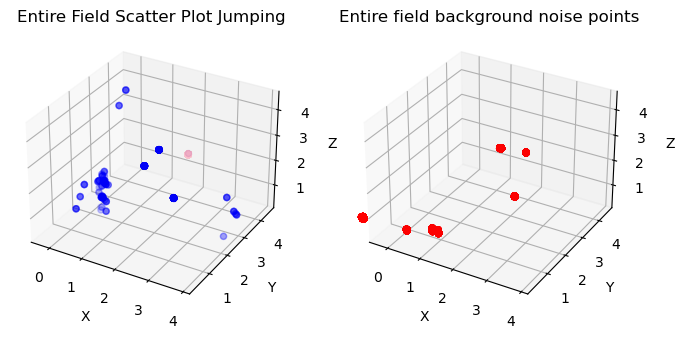

In [65]:
fig, (ax, ax1) = plt.subplots(1,2, subplot_kw={'projection': '3d'}, figsize=(8,12))
ax.scatter(filtered_points[:,0],filtered_points[:,1],filtered_points[:,2], color='blue', alpha=0.1, label='Filtered Points')
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='pink', alpha=0.3, label='Points Removed')
ax.scatter(corresponding_bg_point[0:1,0], corresponding_bg_point[0:1,1], corresponding_bg_point[0:1,2], color='purple', alpha=0.1, label='points_removed')
ax.set_title('Entire Field Scatter Plot Jumping')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# Set the same x and y limits for both plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)



ax1.set_title("Entire field background noise points")
ax1.scatter(bg_noise_merge[:,0], bg_noise_merge[:,1], bg_noise_merge[:,2], color='red', alpha=0.3, label='points_removed')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)

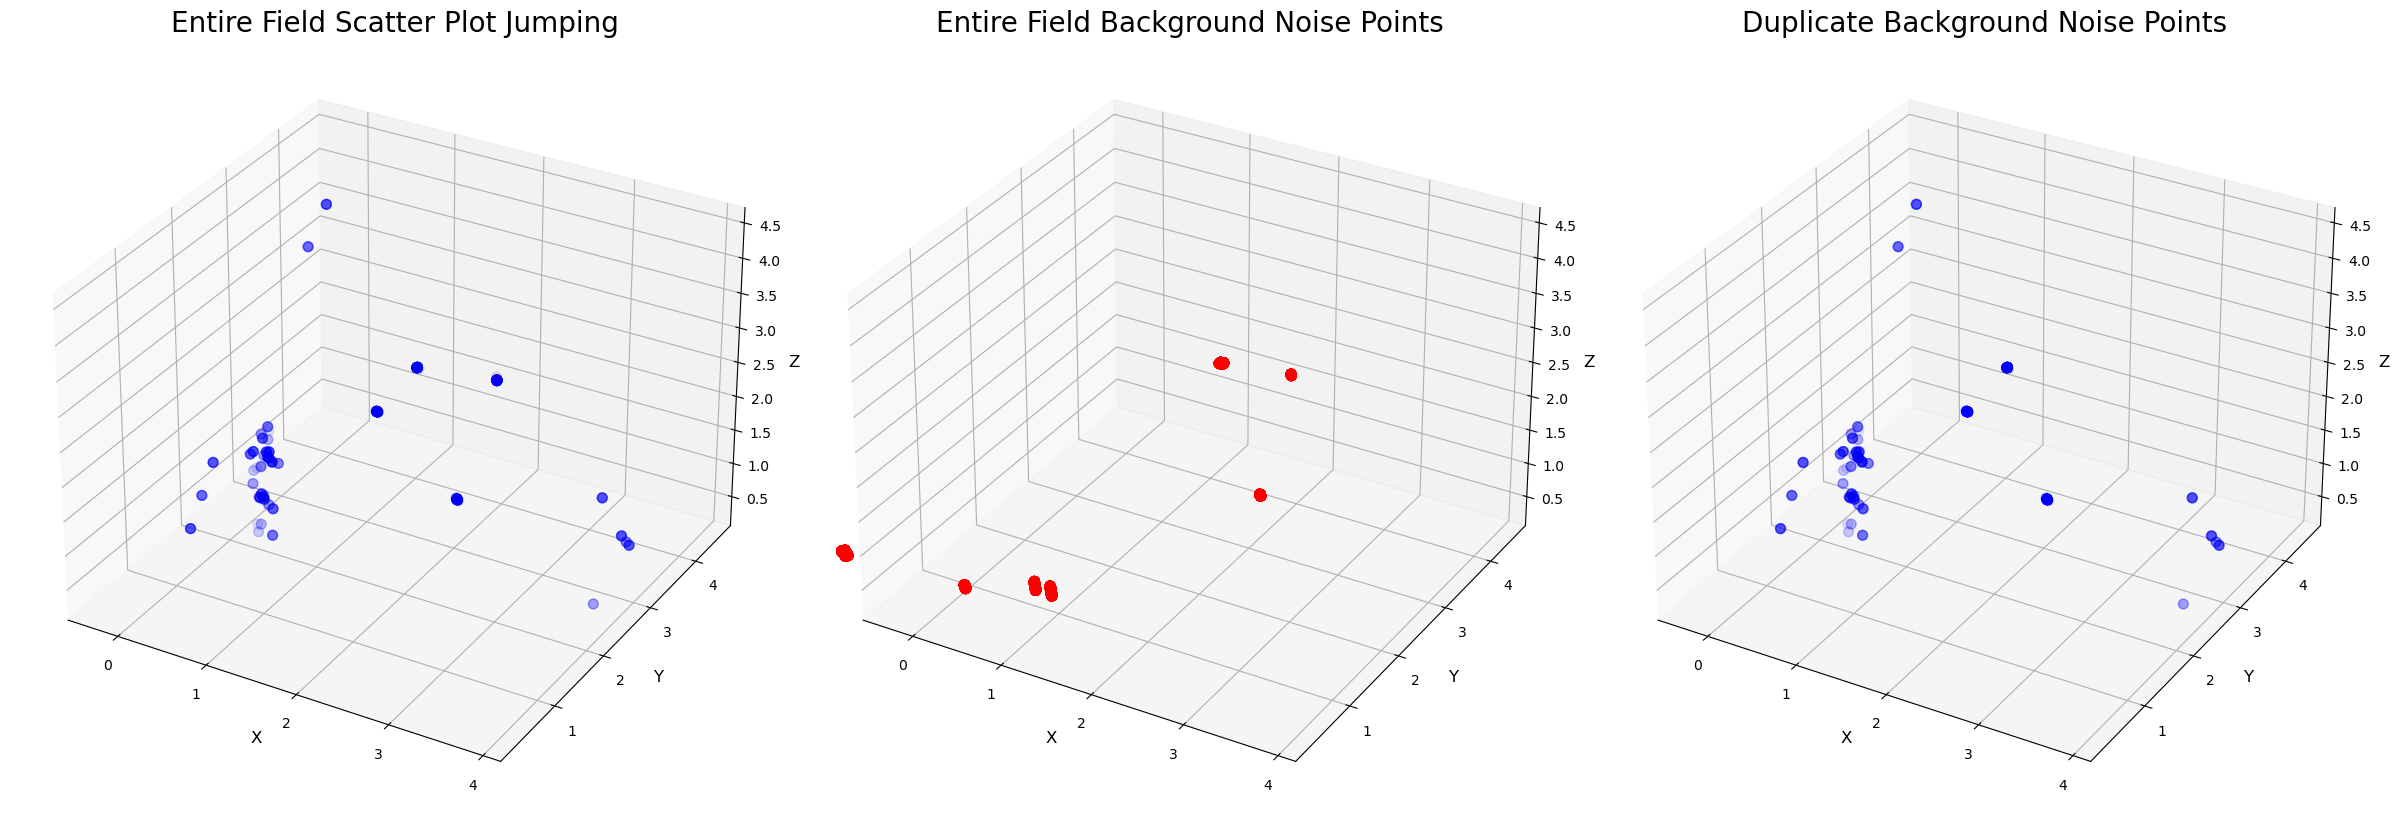

In [66]:
# Create 3 subplots in a row
fig, (ax, ax1, ax2) = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(24, 8))

# First subplot: Filtered points and points removed
ax.scatter(filtered_points[:,0], filtered_points[:,1], filtered_points[:,2], color='blue', alpha=0.1, s=50,label='Filtered Points')
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='blue', alpha=0.1,s=50, label='Points Removed')
ax.scatter(corresponding_bg_point[0:1,0], corresponding_bg_point[0:1,1], corresponding_bg_point[0:1,2], color='purple', s=50,alpha=0.1, label='Corresponding BG Point')
ax.set_title('Entire Field Scatter Plot Jumping', fontsize=20)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set limits for all plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Second subplot: Background noise points
ax1.set_title("Entire Field Background Noise Points", fontsize=20)
ax1.scatter(bg_noise_merge[:,0], bg_noise_merge[:,1], bg_noise_merge[:,2], color='red', alpha=0.3,s=50, label='Background Noise')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)
ax1.set_xlim(x_lim)
ax1.set_ylim(y_lim)
ax1.set_zlim(z_lim)

# Third subplot: Duplicate of ax1 (background noise points)
ax2.set_title("Duplicate Background Noise Points", fontsize=20)
ax2.scatter(filtered_points[:,0], filtered_points[:,1], filtered_points[:,2], color='blue', alpha=0.1,s=50, label='Filtered Points')
ax2.set_xlabel('X', fontsize=12)
ax2.set_ylabel('Y', fontsize=12)
ax2.set_zlabel('Z', fontsize=12)
ax2.set_xlim(x_lim)
ax2.set_ylim(y_lim)
ax2.set_zlim(z_lim)

plt.tight_layout()  # Adjust the layout for clear visibility
plt.show()


In [67]:
print(f"x_lim is {x_lim}")
print(f"y_lim is {y_lim}")
print(f"z_lim is {z_lim}")

x_lim is (-0.4766, 4.09)
y_lim is (0.03125, 4.695)
z_lim is (0.1523, 4.62)


No handles with labels found to put in legend.


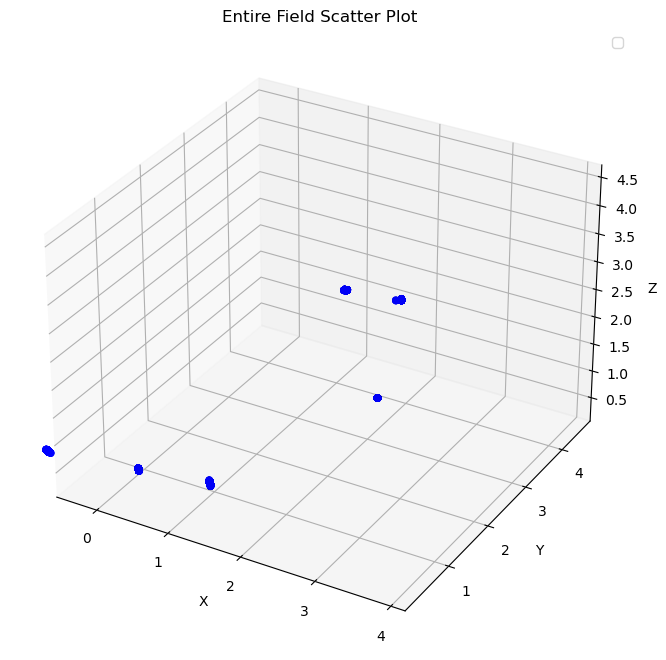

In [68]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_lab_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# # Set axis limits (optional, based on your previous code)
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# zlim = ax.get_zlim()

# Show legend
ax.legend()

plt.show()

(-0.5635, 4.37)


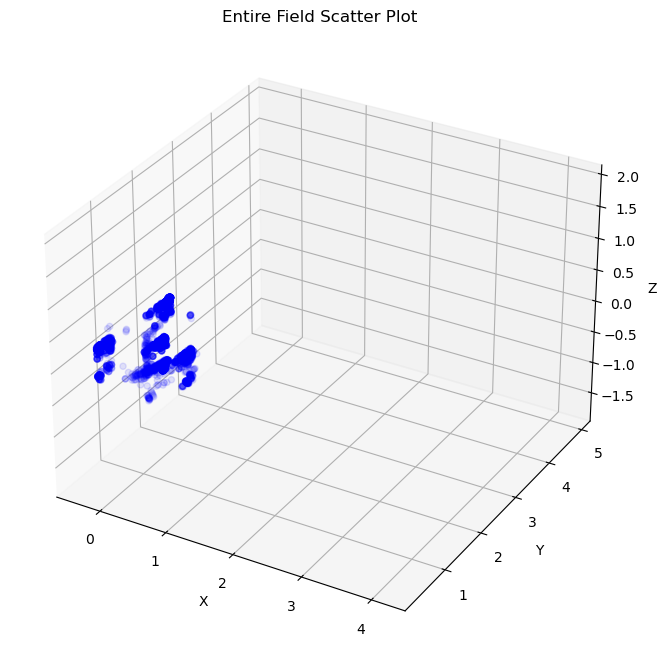

In [24]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/13_08_2024_yang_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)


fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
print(x_lim)

Text(0.5, 0, 'Z')

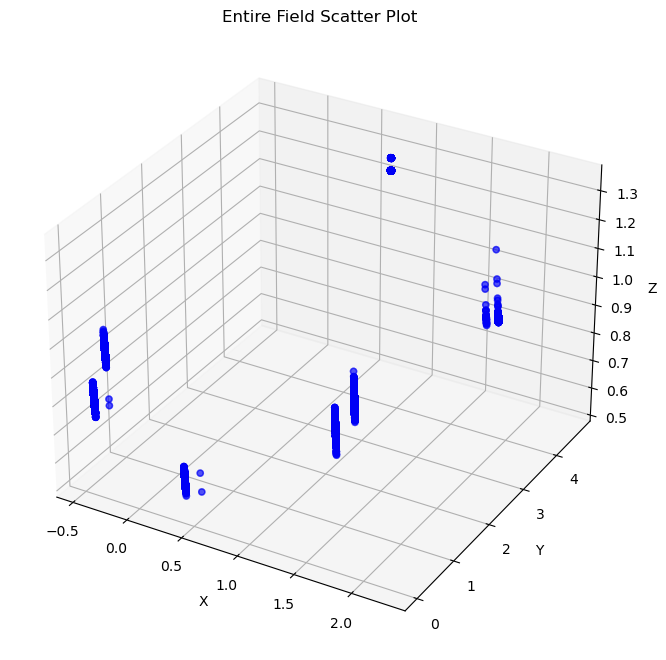

In [25]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 0, 'Z')

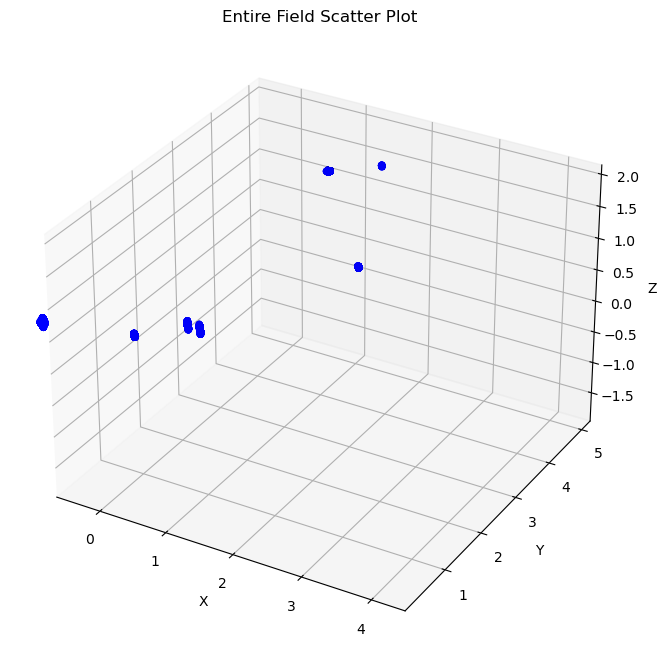

In [26]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 0, 'Z')

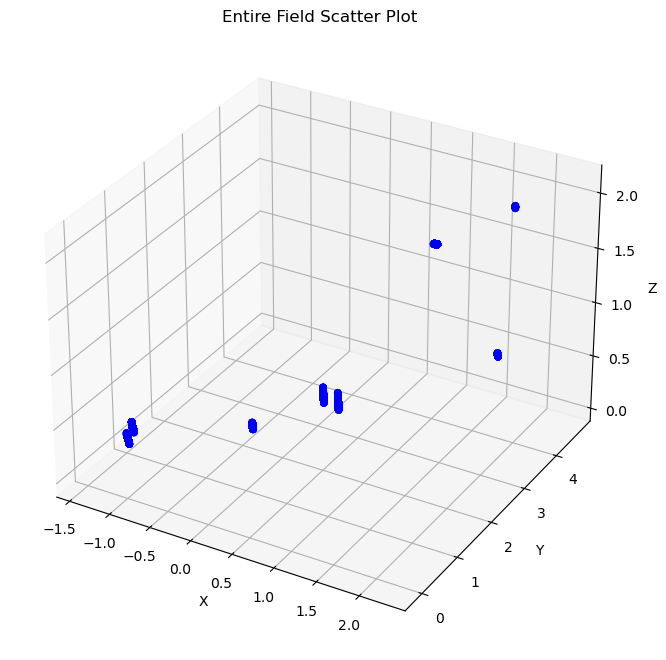

In [27]:
lab_pc_bgnoise = []
#specify bg noise path
bg_noise_folder = 'data/03_09_2024_katie_pc_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

(-1.888671875, 2.060546875)

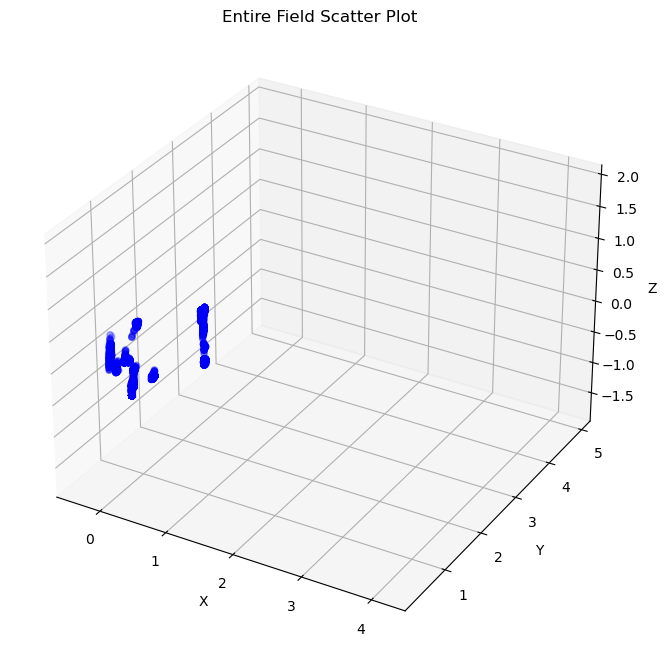

In [28]:
lab_pc_bgnoise = []
#specify bg noise path
#each frame group is normalised
bg_noise_folder = 'data/03_09_2024_katie_pc_norm_bg_noise/*'
bg_files = glob(os.path.join(base_dir, bg_noise_folder))
#loop through files in bg path
for f in bg_files:
    with open(f, 'rb') as file:
        data = pickle.load(file)
        data = np.vstack(data)    
        lab_pc_bgnoise.append(data)
lab_pc_bgnoise = np.vstack(lab_pc_bgnoise)

# lab_pc_bgnoise = normalizeArray(lab_pc_bgnoise)
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(111, projection='3d')  # Create a single 3D subplot

# Plot the filtered points
ax.scatter(lab_pc_bgnoise[:, 0], lab_pc_bgnoise[:, 1], lab_pc_bgnoise[:, 2], 
           color='blue', alpha=0.1)

# Set plot title and labels
ax.set_title('Entire Field Scatter Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

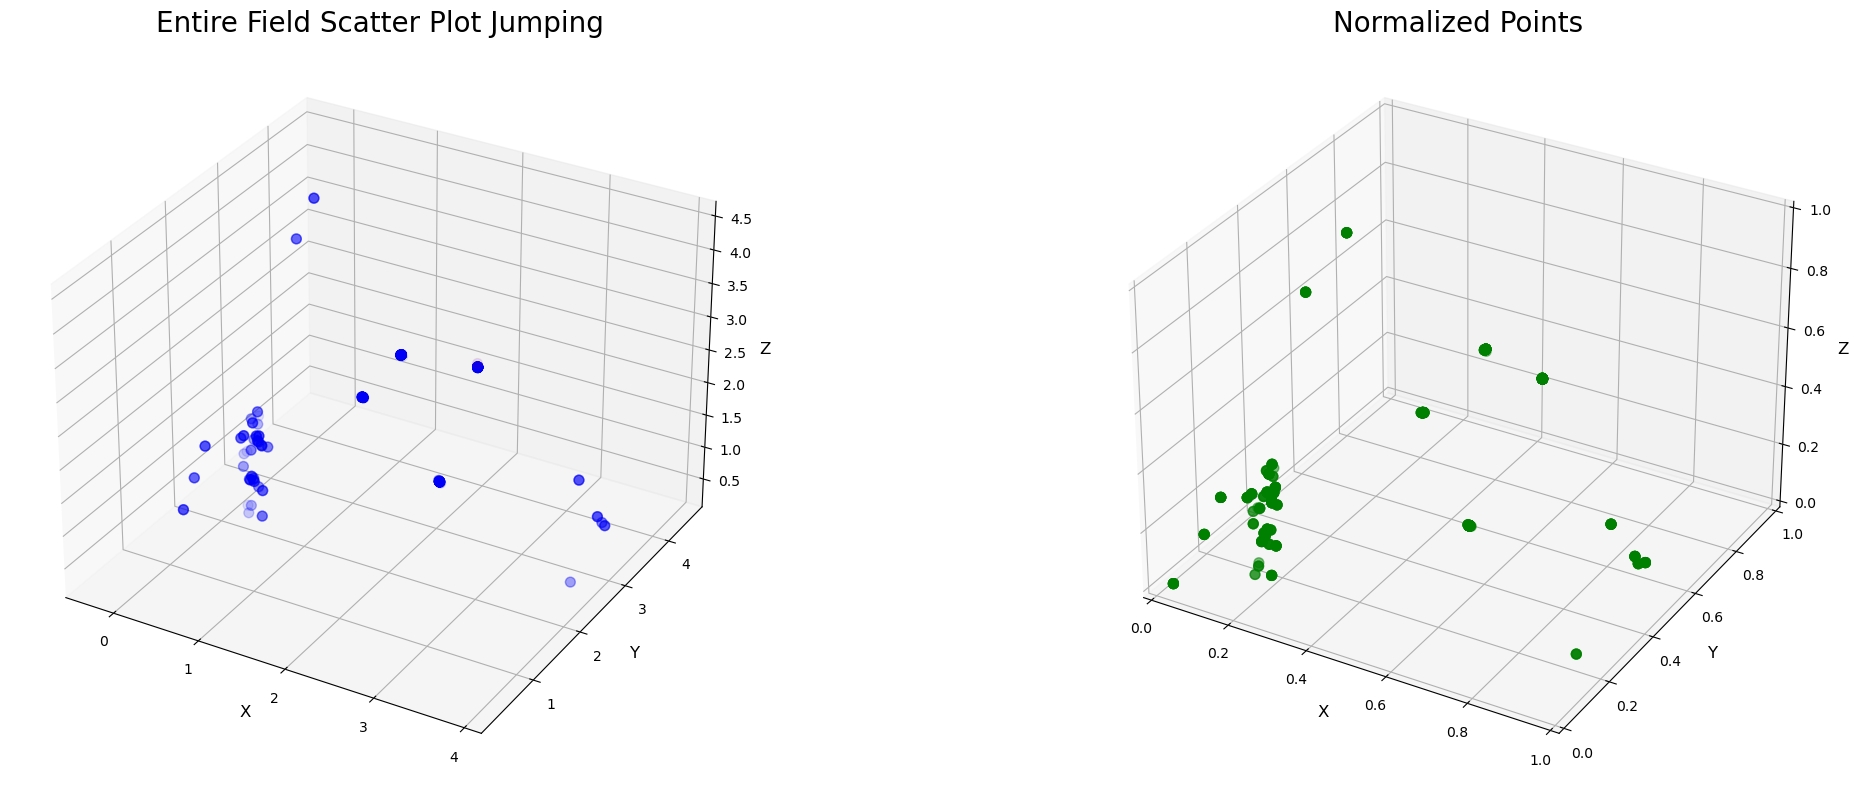

In [69]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Merge filtered_points and points_removed
merged_points = np.vstack((filtered_points, points_removed))

# Normalize the merged points
scaler = MinMaxScaler()
normalized_points = scaler.fit_transform(merged_points[:, :3])  # Normalizing only the first 3 columns (X, Y, Z)

# Create the subplots
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(24, 8))

# First subplot: Filtered points and points removed
ax.scatter(filtered_points[:,0], filtered_points[:,1], filtered_points[:,2], color='blue', alpha=0.1, s=50, label='Filtered Points')
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='blue', alpha=0.1, s=50, label='Points Removed')
ax.scatter(corresponding_bg_point[0:1,0], corresponding_bg_point[0:1,1], corresponding_bg_point[0:1,2], color='purple', s=50, alpha=0.1, label='Corresponding BG Point')
ax.set_title('Entire Field Scatter Plot Jumping', fontsize=20)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set limits for all plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)


# Third subplot: Merged and normalized points
ax1.set_title("Normalized Points", fontsize=20)
ax1.scatter(normalized_points[:, 0], normalized_points[:, 1], normalized_points[:, 2], color='green', alpha=0.5, s=50, label='Merged & Normalized Points')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_zlim(0, 1)

plt.tight_layout()  # Adjust the layout for clear visibility
plt.show()


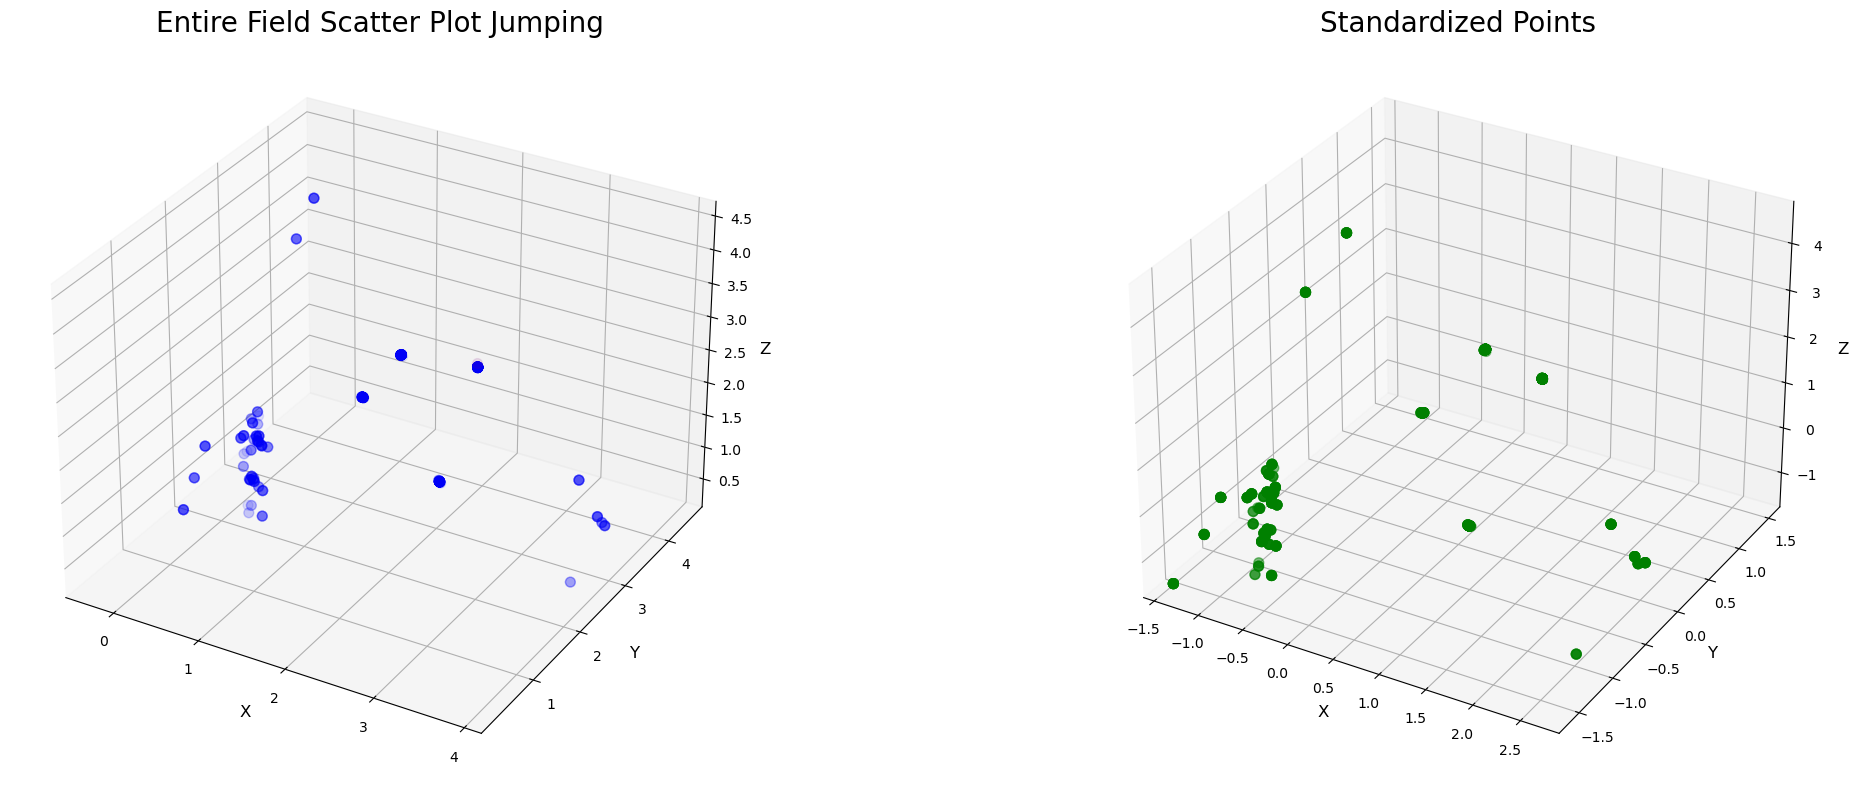

In [70]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Merge filtered_points and points_removed
merged_points = np.vstack((filtered_points, points_removed))

# Standardize the merged points
scaler = StandardScaler()
standardized_points = scaler.fit_transform(merged_points[:, :3])  # Standardizing only the first 3 columns (X, Y, Z)

# Create the subplots
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(24, 8))

# First subplot: Filtered points and points removed
ax.scatter(filtered_points[:,0], filtered_points[:,1], filtered_points[:,2], color='blue', alpha=0.1, s=50, label='Filtered Points')
ax.scatter(points_removed[:,0], points_removed[:,1], points_removed[:,2], color='blue', alpha=0.1, s=50, label='Points Removed')
ax.scatter(corresponding_bg_point[0:1,0], corresponding_bg_point[0:1,1], corresponding_bg_point[0:1,2], color='purple', s=50, alpha=0.1, label='Corresponding BG Point')
ax.set_title('Entire Field Scatter Plot Jumping', fontsize=20)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set limits for all plots
x_lim = (min(min(x_points), min(bg_x)), max(max(x_points), max(bg_x)))
y_lim = (min(min(y_points), min(bg_y)), max(max(y_points), max(bg_y)))
z_lim = (min(min(z_points), min(bg_z)), max(max(z_points), max(bg_z)))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Second subplot: Standardized points
ax1.set_title("Standardized Points", fontsize=20)
ax1.scatter(standardized_points[:, 0], standardized_points[:, 1], standardized_points[:, 2], color='green', alpha=0.5, s=50, label='Merged & Standardized Points')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)

# Optionally, set limits if you want them consistent
ax1.set_xlim(np.min(standardized_points[:, 0]), np.max(standardized_points[:, 0]))
ax1.set_ylim(np.min(standardized_points[:, 1]), np.max(standardized_points[:, 1]))
ax1.set_zlim(np.min(standardized_points[:, 2]), np.max(standardized_points[:, 2]))

plt.tight_layout()  # Adjust the layout for clear visibility
plt.show()


In [79]:
base_dir = os.getcwd()
file = 'cluster_data/padded/jumping/train/katie_point_taken_poss_matrix116.pkl'
sample_file_path = os.path.join(base_dir,file)
with open(sample_file_path, 'rb') as sample_file_path:
    data = pickle.load(sample_file_path)
points = np.vstack(data)

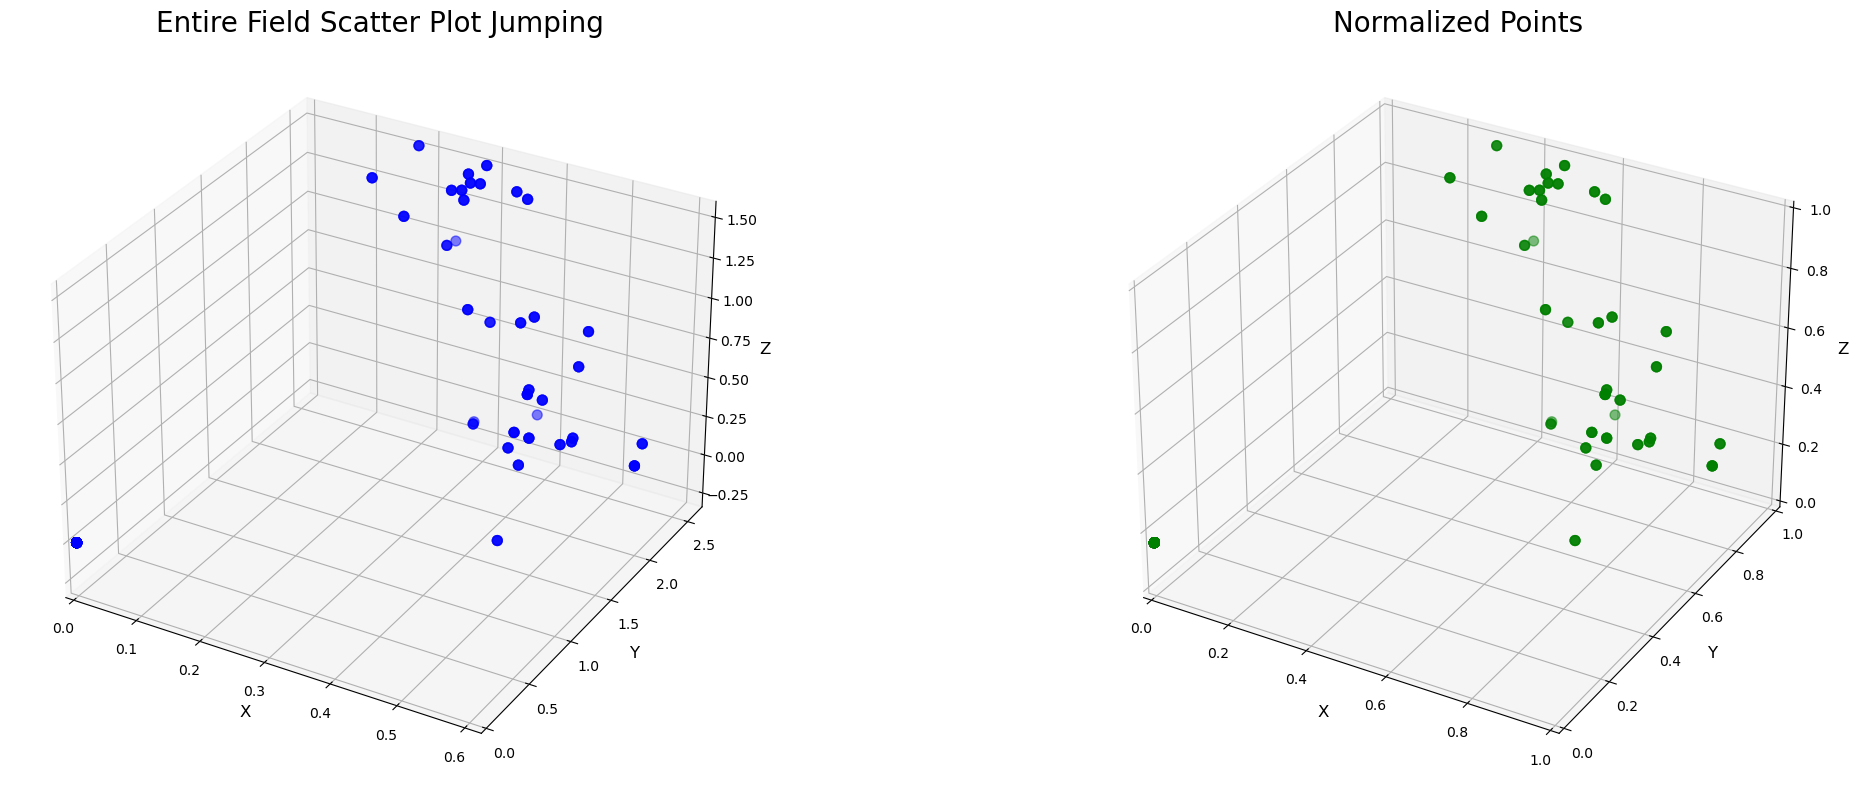

In [89]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler


# Normalize the merged points
scaler = MinMaxScaler()
normalized_points = scaler.fit_transform(points[:, :3])  # Normalizing only the first 3 columns (X, Y, Z)

# Create the subplots
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(24, 8))

# First subplot: Filtered points and points removed
ax.scatter(points[:,0], points[:,1], points[:,2], color='blue', alpha=0.5, s=50, label='Filtered Points')
ax.set_title('Entire Field Scatter Plot Jumping', fontsize=20)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set limits for all plots
x_lim = (min(points[:,0]), max(points[:,0]))
y_lim = (min(points[:,1]), max(points[:,1]))
z_lim = (min(points[:,2]), max(points[:,2]))

ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)


# Third subplot: Merged and normalized points
ax1.set_title("Normalized Points", fontsize=20)
ax1.scatter(normalized_points[:, 0], normalized_points[:, 1], normalized_points[:, 2], color='green', alpha=0.5, s=50, label='Merged & Normalized Points')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.set_zlim(0, 1)

plt.tight_layout()  # Adjust the layout for clear visibility
plt.show()


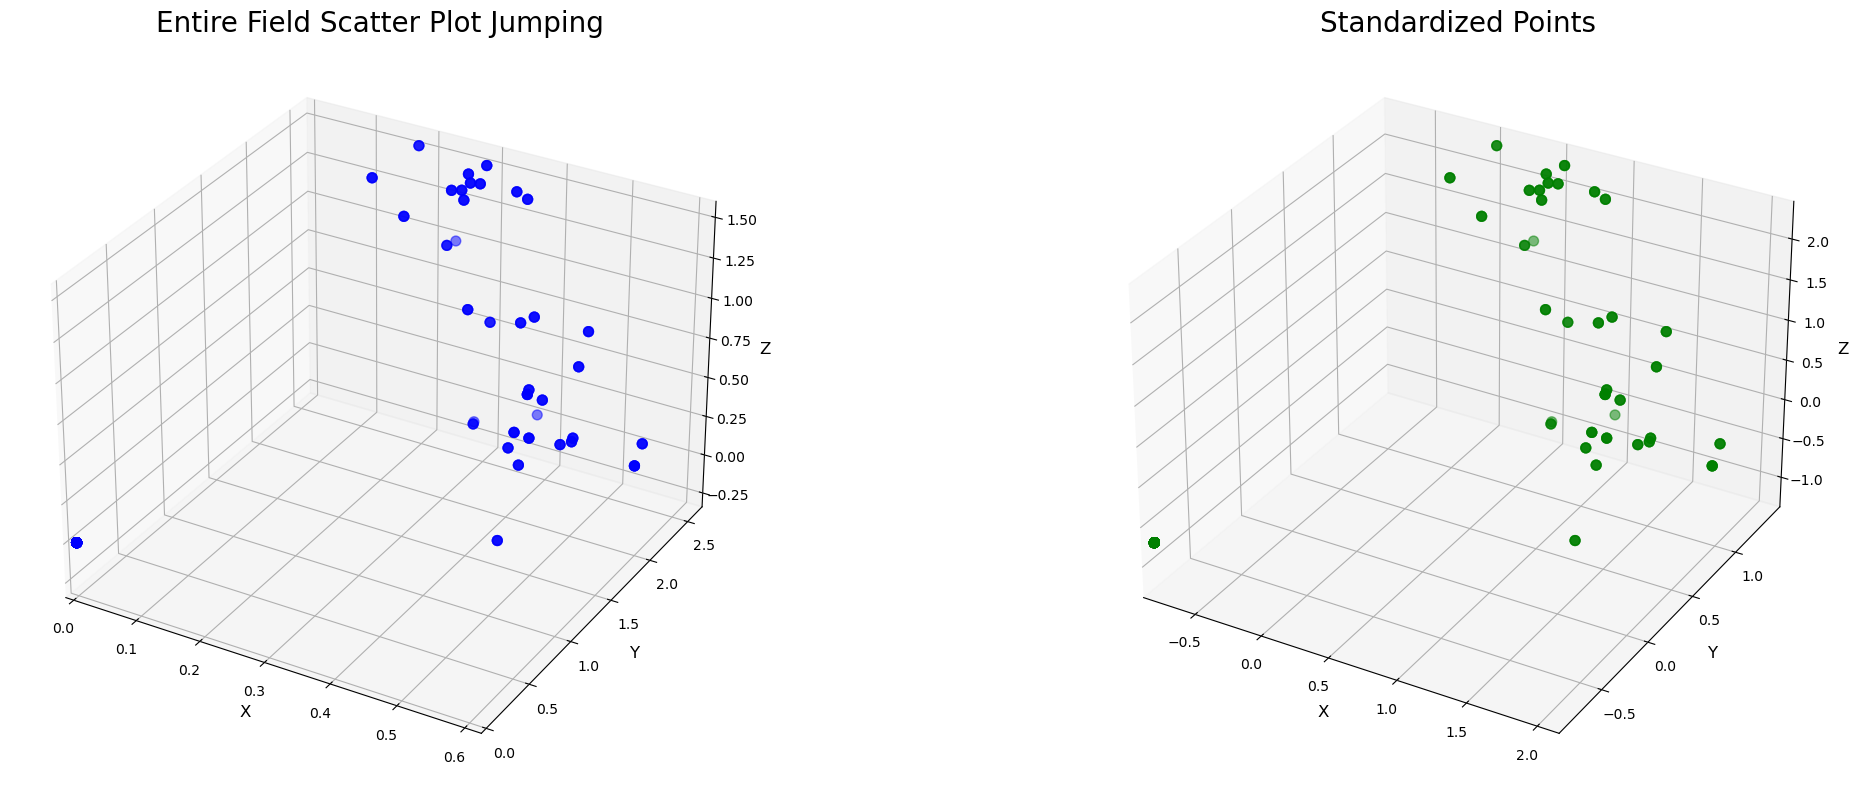

In [88]:
import numpy as np
from sklearn.preprocessing import StandardScaler


# Standardize the merged points
scaler = StandardScaler()
standardized_points = scaler.fit_transform(points[:, :3])  # Standardizing only the first 3 columns (X, Y, Z)

# Create the subplots
fig, (ax, ax1) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(24, 8))

# First subplot: Filtered points and points removed
ax.scatter(points[:,0], points[:,1], points[:,2], color='blue', alpha=0.5, s=50, label='Filtered Points')
ax.set_title('Entire Field Scatter Plot Jumping', fontsize=20)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)

# Set limits for all plots
x_lim = (min(points[:,0]), max(points[:,0]))
y_lim = (min(points[:,1]), max(points[:,1]))
z_lim = (min(points[:,2]), max(points[:,2]))
ax.set_xlim(x_lim)
ax.set_ylim(y_lim)
ax.set_zlim(z_lim)

# Second subplot: Standardized points
ax1.set_title("Standardized Points", fontsize=20)
ax1.scatter(standardized_points[:, 0], standardized_points[:, 1], standardized_points[:, 2], color='green', alpha=0.5, s=50, label='Merged & Standardized Points')
ax1.set_xlabel('X', fontsize=12)
ax1.set_ylabel('Y', fontsize=12)
ax1.set_zlabel('Z', fontsize=12)

# Optionally, set limits if you want them consistent
ax1.set_xlim(np.min(standardized_points[:, 0]), np.max(standardized_points[:, 0]))
ax1.set_ylim(np.min(standardized_points[:, 1]), np.max(standardized_points[:, 1]))
ax1.set_zlim(np.min(standardized_points[:, 2]), np.max(standardized_points[:, 2]))

plt.tight_layout()  # Adjust the layout for clear visibility
plt.show()


In [82]:
import tensorflow as tf
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype="float16")
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label

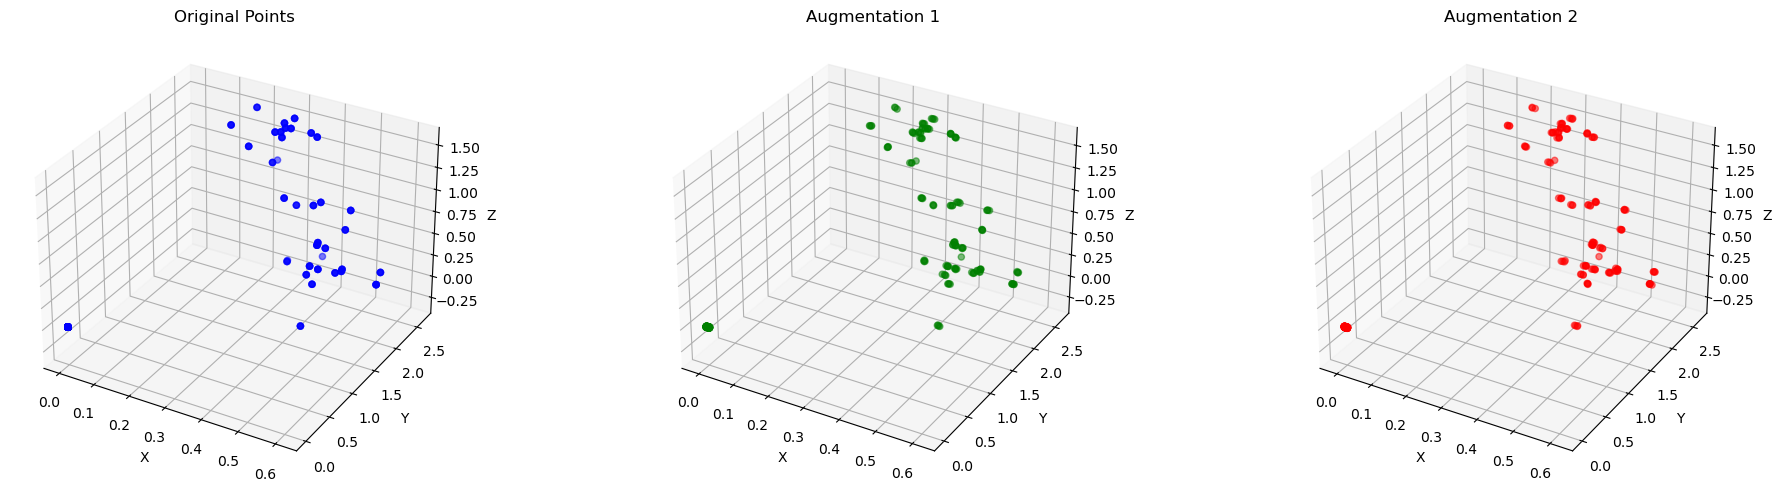

In [90]:
label = "jumping"  # Label
augmented_1, _ = augment(points.copy(), label)
augmented_2, _ = augment(points.copy(), label)
augmented_3, _ = augment(points.copy(), label)

# Create a 4-subplot layout
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'}, figsize=(20, 5))

# Original points
axs[0].scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', alpha=0.5)
axs[0].set_title('Original Points')

# Augmented set 1
axs[1].scatter(augmented_1[:, 0], augmented_1[:, 1], augmented_1[:, 2], c='green', alpha=0.5)
axs[1].set_title('Augmentation 1')

# Augmented set 2
axs[2].scatter(augmented_2[:, 0], augmented_2[:, 1], augmented_2[:, 2], c='red', alpha=0.5)
axs[2].set_title('Augmentation 2')


# Set labels for all subplots
for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()
